### This code identifies the regions of the genome that are completely differentially methylated between Occipital Frontal Cortex endos and Blood

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pyreadr

In [3]:
# Read in Blood samples_sheet
blood_sample_info = pd.read_csv("/Volumes/Research_Data/Research_Data/Sperm/Blood_Sperm/Blood/Blood_info.csv.csv",header=0,index_col=0)
blood_sample_info.iloc[:]

# Read in blood beta values
blood_beta_vals = pd.read_csv("/Volumes/Research_Data/Research_Data/Sperm/Blood_Sperm/Blood/blood_betas.csv",header=0,index_col=0)
blood_beta_vals.iloc[:]

# Read in endo sample_sheet
endo_sample_info = pd.read_csv("/Users/chadpollard/Desktop/Endometrial_Tissue/Letourneau_MethylationEPIC_20201007/SampleSheet-Letourneau_MethylationEPIC_20201007.csv",header=0,index_col=0)
endo_sample_info.iloc[:]

# Read in endo Beta Values
endo_beta_vals = pd.read_csv("/Users/chadpollard/Desktop/Endometrial_Tissue/Letourneau_MethylationEPIC_20201007/Letourneau_MethylationEPIC_20201007_beta_values.csv",header=0,index_col=0)
endo_beta_vals.iloc[:]

,204668830012_R01C01,204668830012_R02C01,204668830012_R03C01,204668830012_R04C01,204668830012_R05C01,204668830012_R06C01,204668830012_R07C01,204668830012_R08C01,204848060031_R01C01,204848060031_R02C01,...,204848060031_R07C01,204848060031_R08C01,204848060060_R01C01,204848060060_R02C01,204848060060_R03C01,204848060060_R04C01,204848060060_R05C01,204848060060_R06C01,204848060060_R07C01,204848060060_R08C01
cg18478105,0.021235,0.015982,0.030057,0.021355,0.010386,0.020013,0.024182,0.018922,0.008713,0.017553,...,0.034648,0.030648,0.025147,0.027283,0.022521,0.024334,0.009343,0.020503,0.031511,0.022176
cg09835024,0.013875,0.041711,0.055016,0.026186,0.038565,0.094831,0.033304,0.052578,0.010804,0.045821,...,0.164012,0.041712,0.050446,0.024764,0.013507,0.085103,0.033403,0.061289,0.032590,0.019066
cg14361672,0.374347,0.335959,0.374535,0.458592,0.386232,0.471619,0.336853,0.262158,0.263961,0.343299,...,0.390399,0.409974,0.347630,0.356378,0.666624,0.528485,0.323055,0.596134,0.243059,0.280375
cg01763666,0.724893,0.743267,0.861989,0.771949,0.752197,0.797993,0.878376,0.846344,0.862374,0.866100,...,0.808161,0.794520,0.592311,0.820806,0.600896,0.629720,0.755197,0.563436,0.854682,0.824398
cg12950382,0.938472,0.893281,0.937109,0.896365,0.925226,0.951389,0.921852,0.952565,0.943551,0.947397,...,0.946415,0.937936,0.894379,0.903309,0.917928,0.976246,0.918822,0.887637,0.911071,0.883693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23079522,0.964967,0.886404,0.860858,0.935132,0.912914,0.925383,0.910052,0.901866,0.906481,0.930062,...,0.912425,0.907381,0.924436,0.920818,0.935105,0.932891,0.909574,0.974216,0.905166,0.933419
cg16818145,0.855698,0.829161,0.849556,0.857951,0.844309,0.862158,0.843906,0.893011,0.771637,0.872849,...,0.875389,0.858537,0.809819,0.885676,0.853707,0.878130,0.841342,0.881529,0.850195,0.834328
cg14585103,0.650575,0.703750,0.660096,0.632038,0.681754,0.622585,0.629649,0.751961,0.631958,0.614291,...,0.650091,0.654674,0.628624,0.595325,0.724292,0.689695,0.712422,0.640906,0.661910,0.652775
cg10633746,0.107970,0.131558,0.123576,0.122240,0.110600,0.110117,0.122715,0.105031,0.105604,0.118064,...,0.119313,0.108510,0.086453,0.105131,0.114409,0.113569,0.116495,0.114156,0.097170,0.112079


In [139]:
# Looking at annotated regions

In [10]:
# Reading in all USEQ Regions
# gene_info = pd.read_csv("/Volumes/Research_Data/My_Github/Endometriosis_Analysis/USEQ_Regions_EPIC.txt",sep='\t',header=0)
# gene_info.iloc[:]

,CHR,START,STOP,CG,NAME
0,chr20,61847650,61847651,cg18478105,chr20_61846439_61848437
1,chrX,24072640,24072641,cg09835024,chrX_24072414_24073135
2,chr14,93581139,93581140,cg05451842,chr14_93580644_93581879
3,chr16,57865112,57865113,cg14797042,chr16_57864721_57865113
4,chr6,15248173,15248174,cg09838562,chr6_15247815_15249151
...,...,...,...,...,...
455420,chr1,90456596,90456597,cg21822051,chr1_90456081_90457602
455421,chr12,52388360,52388361,cg10615271,chr12_52386656_52388361
455422,chr3,182782277,182782278,cg16818145,chr3_182781611_182783244
455423,chr8,139940608,139940609,cg14585103,chr8_139940608_139940609


In [7]:
# Reading in just the signifcantly Differentially Methylated Regions
gene_info = pd.read_csv("/Volumes/Research_Data/My_Github/Endometriosis_Analysis/significant_USEQ_Regions_EPIC.txt",sep='\t')
gene_info.iloc[:]

,CHR,START,STOP,CG,NAME
0,chr18,7084619,7084620,cg22774547,chr18_7084619_7084620
1,chr10,116441615,116441616,cg05234276,chr10_116441615_116441616
2,chr9,94708247,94708248,cg07751528,chr9_94708247_94708248
3,chr7,81949245,81949246,cg17294136,chr7_81949021_81949246
4,chr7,81949021,81949022,cg26568026,chr7_81949021_81949246
...,...,...,...,...,...
184,chr4,57861927,57861928,cg18716912,chr4_57861927_57861928
185,chr14,78205329,78205330,cg13854081,chr14_78205329_78205330
186,chr18,3538691,3538692,cg05111420,chr18_3538691_3538692
187,chr11,47879921,47879922,cg13338891,chr11_47879921_47879922


In [8]:
result = {}
count = 0

for index in gene_info.index:
    key = gene_info.iloc[index,4]
    value = gene_info.iloc[index,3]

    if key not in result:
        result[key] = [value]
    else:    
        result[key].append(value)

print(len(result))

173


In [10]:
# Calculates the mean beta value for all blood samples at all promoters
blood_df=pd.DataFrame()
for key in result:
    beta_key = blood_beta_vals.loc[result[key],:]
    blood_df[key] = (np.mean(beta_key))
blood_df.iloc[:]

,chr18_7084619_7084620,chr10_116441615_116441616,chr9_94708247_94708248,chr7_81949021_81949246,chr4_182878254_182878255,chr8_130463123_130463124,chr15_63548963_63548964,chr8_30661942_30661943,chr5_112707768_112707769,chr8_125069435_125069436,...,chr1_231666092_231666117,chr8_13051810_13051811,chr9_110815971_110815972,chr16_87226137_87226138,chr9_111236249_111236250,chr4_57861927_57861928,chr14_78205329_78205330,chr18_3538691_3538692,chr11_47879921_47879922,chr7_36318491_36318492
203219670028_R01C01,0.913330,0.888394,0.937725,0.920023,0.948034,0.940300,0.887834,0.939893,0.860370,0.908200,...,0.026903,0.925122,0.878304,0.902494,0.851150,0.922926,0.937884,0.951845,0.936177,0.826951
203219670028_R02C01,0.823940,0.842233,0.837425,0.879754,0.956800,0.925092,0.896024,0.953557,0.902339,0.928709,...,0.042293,0.876813,0.829156,0.921772,0.815649,0.918107,0.864003,0.909985,0.944076,0.872655
203219670028_R03C01,0.896858,0.930037,0.920619,0.920530,0.954995,0.927093,0.833333,0.923007,0.931935,0.905693,...,0.039629,0.902105,0.835350,0.801149,0.896245,0.923305,0.913271,0.928970,0.939432,0.857032
203219670028_R04C01,0.853880,0.884230,0.901107,0.902437,0.946647,0.933220,0.887317,0.939905,0.904190,0.914032,...,0.041228,0.854530,0.893533,0.935850,0.860057,0.956692,0.889267,0.929367,0.937045,0.907031
203219670028_R05C01,0.918940,0.918478,0.920064,0.925768,0.946805,0.945388,0.882009,0.944698,0.893891,0.925877,...,0.050792,0.936745,0.818016,0.930230,0.909575,0.929204,0.942005,0.945733,0.942892,0.862424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203225140170_R04C01,0.850214,0.865451,0.875211,0.915750,0.905704,0.914731,0.938945,0.948231,0.888622,0.919819,...,0.044076,0.878895,0.840093,0.908850,0.884550,0.945858,0.905372,0.946325,0.941019,0.878760
203225140170_R07C01,0.886047,0.909698,0.909764,0.899628,0.903380,0.903540,0.819557,0.902672,0.903536,0.878432,...,0.048604,0.838752,0.877435,0.870231,0.911636,0.884824,0.869523,0.944795,0.878269,0.766848
203225140170_R08C01,0.880369,0.866619,0.937289,0.871733,0.935535,0.930987,0.842447,0.976306,0.868326,0.943131,...,0.093724,0.826103,0.789250,0.927754,0.764323,0.928384,0.841316,0.948280,0.963836,0.789054
203225140175_R05C01,0.784358,0.807119,0.938445,0.902976,0.903868,0.944010,0.805391,0.840985,0.696591,0.874627,...,0.114372,0.928297,0.767434,0.787709,0.690949,0.824116,0.949097,0.905000,0.914963,0.587105


In [11]:
blood_mean_betas = blood_df.mean(axis=0)
blood_mean_betas = blood_mean_betas.to_frame()
blood_mean_betas.columns = ['Mean_of_betas_blood']
blood_mean_betas.iloc[:]

,Mean_of_betas_blood
chr18_7084619_7084620,0.875556
chr10_116441615_116441616,0.884252
chr9_94708247_94708248,0.909228
chr7_81949021_81949246,0.911585
chr4_182878254_182878255,0.932254
...,...
chr4_57861927_57861928,0.932314
chr14_78205329_78205330,0.901356
chr18_3538691_3538692,0.930371
chr11_47879921_47879922,0.939093


In [12]:
# Calculates the mean beta value for all endo samples at all promoters
endo_df=pd.DataFrame()
for key in result:
    beta_key = endo_beta_vals.loc[result[key],:]
    endo_df[key] = (np.mean(beta_key))
endo_df.iloc[:]

,chr18_7084619_7084620,chr10_116441615_116441616,chr9_94708247_94708248,chr7_81949021_81949246,chr4_182878254_182878255,chr8_130463123_130463124,chr15_63548963_63548964,chr8_30661942_30661943,chr5_112707768_112707769,chr8_125069435_125069436,...,chr1_231666092_231666117,chr8_13051810_13051811,chr9_110815971_110815972,chr16_87226137_87226138,chr9_111236249_111236250,chr4_57861927_57861928,chr14_78205329_78205330,chr18_3538691_3538692,chr11_47879921_47879922,chr7_36318491_36318492
204668830012_R01C01,0.096790,0.080313,0.118275,0.137028,0.127218,0.171389,0.109635,0.158367,0.111675,0.121075,...,0.833014,0.079077,0.068680,0.108417,0.114541,0.115615,0.120912,0.150802,0.168064,0.065969
204668830012_R02C01,0.052705,0.066379,0.080771,0.104035,0.111463,0.113406,0.081136,0.103123,0.108203,0.095028,...,0.865310,0.067632,0.037636,0.091930,0.079913,0.083992,0.094236,0.128777,0.123430,0.083548
204668830012_R03C01,0.102620,0.122340,0.183251,0.148811,0.172716,0.183490,0.116738,0.174246,0.138973,0.155355,...,0.846658,0.100055,0.073031,0.141125,0.048614,0.155790,0.117961,0.159422,0.168652,0.099671
204668830012_R04C01,0.195198,0.162089,0.246707,0.210190,0.264448,0.249286,0.184991,0.255733,0.207545,0.244716,...,0.794545,0.185782,0.147103,0.223803,0.180487,0.251304,0.219946,0.224447,0.255675,0.147962
204668830012_R05C01,0.100600,0.077916,0.148010,0.132902,0.128873,0.165356,0.165348,0.143860,0.131626,0.135602,...,0.861692,0.089123,0.067792,0.133427,0.097918,0.126847,0.116227,0.161414,0.180434,0.075030
204668830012_R06C01,0.124949,0.097433,0.146830,0.159544,0.133272,0.155903,0.119058,0.171481,0.111010,0.128527,...,0.864279,0.101711,0.074699,0.158978,0.102086,0.122553,0.161749,0.172052,0.196398,0.107591
204668830012_R07C01,0.135035,0.108112,0.175940,0.193200,0.172300,0.196068,0.147607,0.196109,0.165607,0.197525,...,0.826281,0.092977,0.101925,0.161552,0.114200,0.196405,0.161126,0.182560,0.241112,0.155092
204668830012_R08C01,0.040283,0.043010,0.066392,0.079666,0.090635,0.098150,0.064749,0.101093,0.093370,0.097850,...,0.914253,0.058857,0.047636,0.047970,0.084932,0.064418,0.084644,0.102411,0.082635,0.051380
204848060031_R01C01,0.068235,0.057405,0.087596,0.126889,0.117028,0.147270,0.065886,0.113417,0.029566,0.093912,...,0.873345,0.065614,0.054850,0.095049,0.091385,0.106254,0.093823,0.143219,0.116405,0.072982
204848060031_R02C01,0.105577,0.101383,0.140339,0.133927,0.150432,0.172071,0.094574,0.175490,0.115325,0.138974,...,0.845956,0.127238,0.073593,0.125183,0.072233,0.120427,0.119383,0.161268,0.181681,0.102460


In [13]:
endo_mean_betas = endo_df.mean(axis=0)
endo_mean_betas = endo_mean_betas.to_frame()
endo_mean_betas.columns = ['Mean_of_betas_endo']
endo_mean_betas.iloc[:]

,Mean_of_betas_endo
chr18_7084619_7084620,0.118976
chr10_116441615_116441616,0.100867
chr9_94708247_94708248,0.155691
chr7_81949021_81949246,0.159982
chr4_182878254_182878255,0.164776
...,...
chr4_57861927_57861928,0.169959
chr14_78205329_78205330,0.137737
chr18_3538691_3538692,0.169294
chr11_47879921_47879922,0.180798


In [15]:
all_betas = pd.merge(endo_mean_betas,blood_mean_betas,left_index=True,right_index=True)
all_betas["Delta"] = all_betas.Mean_of_betas_blood - all_betas.Mean_of_betas_endo
all_betas = all_betas.sort_values(by=["Delta"],ascending=False)
all_betas.iloc[:]

,Mean_of_betas_endo,Mean_of_betas_blood,Delta
chr19_5783127_5783128,0.005616,0.928807,0.923190
chr3_8671361_8671362,0.006651,0.878558,0.871907
chrY_14070990_14070991,0.032571,0.835254,0.802684
chr13_30916564_30916565,0.146561,0.948610,0.802049
chr10_5986488_5986489,0.132931,0.931383,0.798453
...,...,...,...
chr17_65974972_65974973,0.170894,0.921097,0.750203
chr16_69258872_69258873,0.118568,0.868746,0.750177
chr4_38763439_38763485,0.834041,0.064659,-0.769382
chr1_231666092_231666117,0.834542,0.051545,-0.782997


In [82]:
high_blood_low_endo_methylation = []
high_endo_low_blood_methylation = []
large_delta = []
for promoter in all_betas.index:
    sample = all_betas.loc[promoter,"Delta"]
    if sample > 0.75:
        large_delta.append(promoter)
        high_blood_low_endo_methylation.append(promoter)
    if sample < -0.75:
        large_delta.append(promoter)
        high_endo_low_blood_methylation.append(promoter)

print(len(large_delta))
print(len(high_blood_low_endo_methylation))
print(len(high_endo_low_blood_methylation))

high_blood_low_endo_methylation_deltas = all_betas.loc[high_blood_low_endo_methylation,:]
high_blood_low_endo_methylation_deltas = high_blood_low_endo_methylation_deltas.sort_values(by=["Delta"],ascending=False)
high_blood_low_endo_methylation_deltas.iloc[:]

high_endo_low_blood_methylation_deltas = all_betas.loc[high_endo_low_blood_methylation,:]
high_endo_low_blood_methylation_deltas = high_endo_low_blood_methylation_deltas.sort_values(by=["Delta"],ascending=True)
high_endo_low_blood_methylation_deltas.iloc[:]
        

173
170
3


,Mean_of_betas_endo,Mean_of_betas_blood,Delta
chr12_9911289_9911290,0.855979,0.043156,-0.812823
chr1_231666092_231666117,0.834542,0.051545,-0.782997
chr4_38763439_38763485,0.834041,0.064659,-0.769382


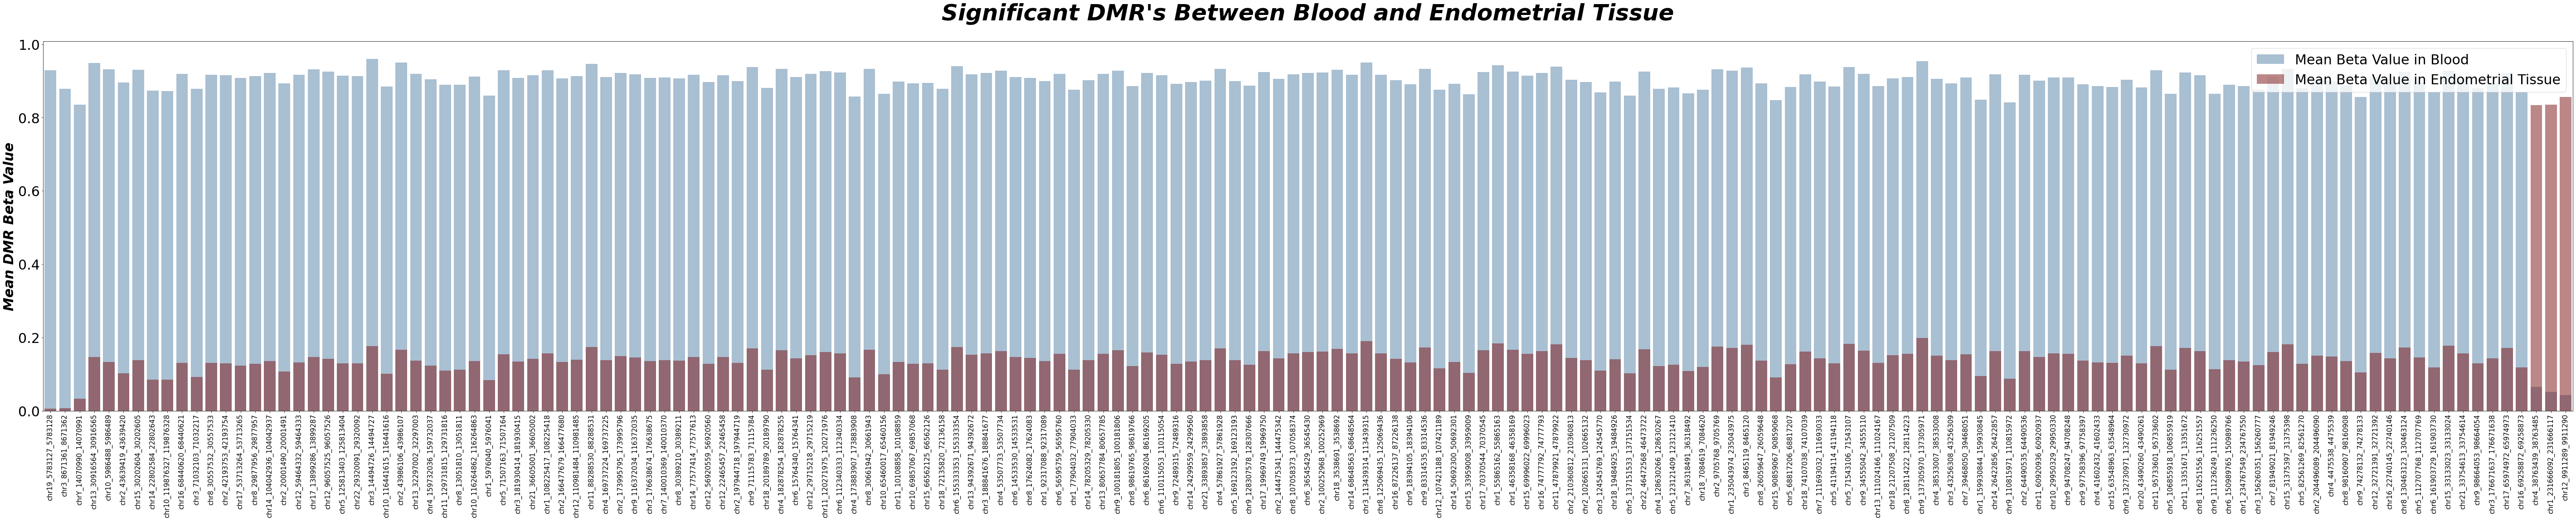

<Figure size 432x288 with 0 Axes>

In [298]:
# barplot
plt.figure(figsize=(100,15))
sns.barplot(data=all_betas,x=all_betas.index,y='Mean_of_betas_blood',color='steelblue',label='Mean Beta Value in Blood',alpha = .5)
sns.barplot(data=all_betas,x=all_betas.index,y='Mean_of_betas_endo',color = 'darkred', label='Mean Beta Value in Endometrial Tissue',alpha = .5)
plt.legend(fontsize=30)
plt.title("Significant DMR's Between Blood and Endometrial Tissue",fontdict= {'fontsize': 50, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.05)
plt.ylabel("Mean DMR Beta Value",fontdict= {'fontsize': 30, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 30)
plt.show()
plt.clf()

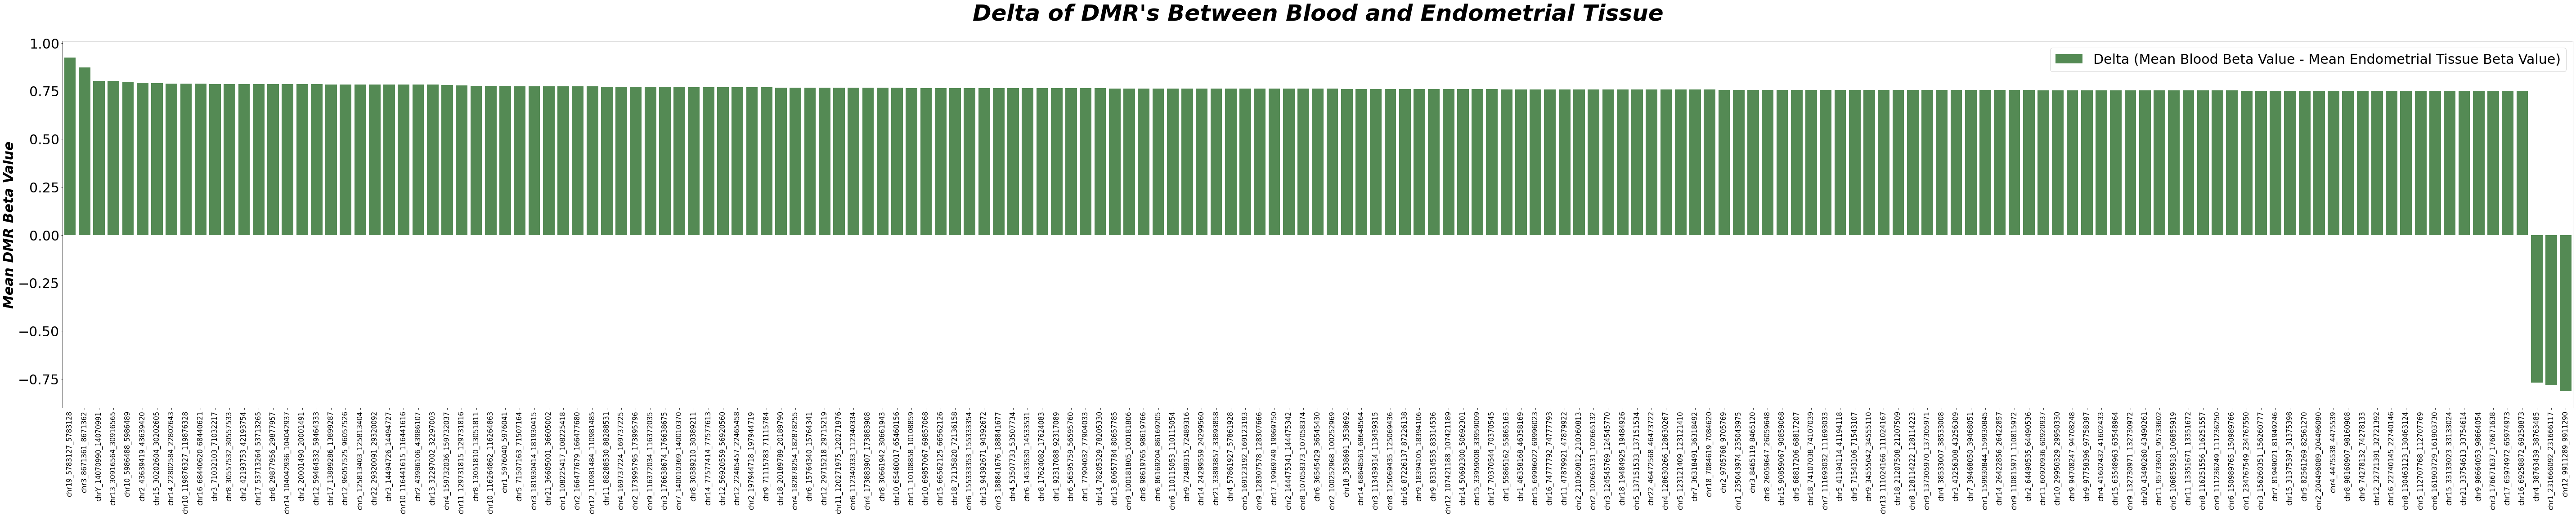

<Figure size 432x288 with 0 Axes>

In [296]:
# barplot
plt.figure(figsize=(100,15))
sns.barplot(data=all_betas,x=all_betas.index,y='Delta',color = 'darkgreen',alpha = .7,label='Delta (Mean Blood Beta Value - Mean Endometrial Tissue Beta Value)')
plt.legend(fontsize=30)
plt.title("Delta of DMR's Between Blood and Endometrial Tissue",fontdict= {'fontsize': 50, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.05)
plt.ylabel("Mean DMR Beta Value",fontdict= {'fontsize': 30, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 30)
plt.show()
plt.clf()

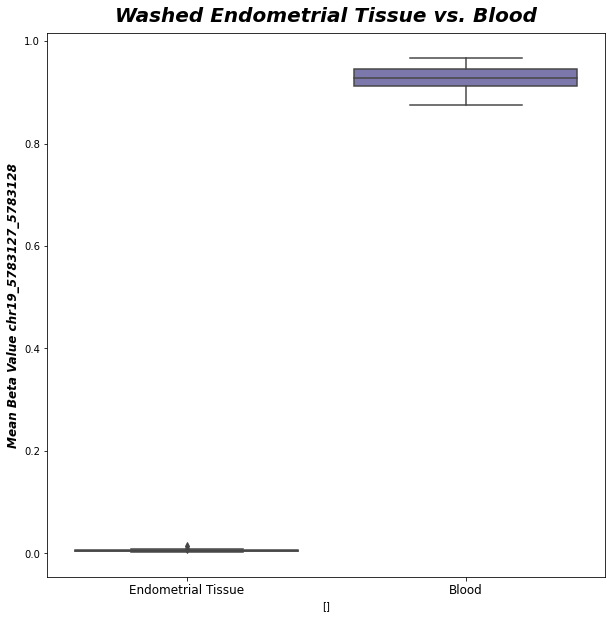

<Figure size 432x288 with 0 Axes>

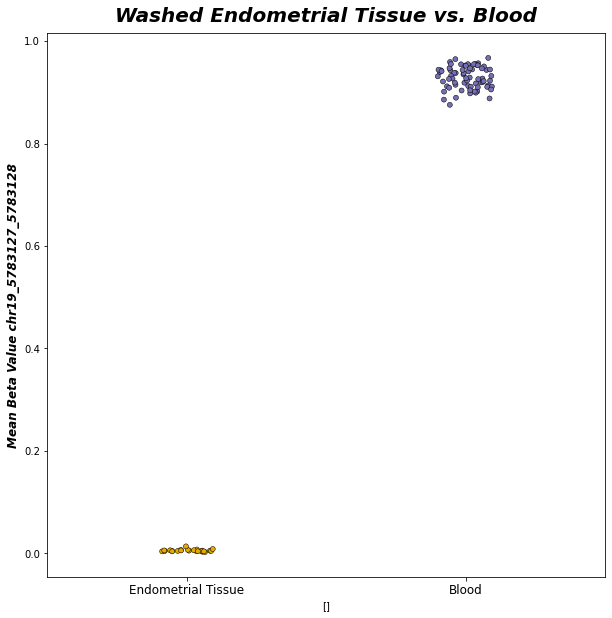

<Figure size 432x288 with 0 Axes>

In [288]:
#Plotting a Random non-significant site
endo_region = endo_df.loc[:,"chr19_5783127_5783128"]
endo_region = pd.DataFrame(endo_region)
endo_region["Tissue"] = "Endometrial Tissue"
endo_region.iloc[:]

blood_region = blood_df.loc[:,"chr19_5783127_5783128"]
blood_region = pd.DataFrame(blood_region)
blood_region["Tissue"] = "Blood"
# blood_dlk1.iloc[:]

combined_region = pd.DataFrame()
combined_region = combined_region.append(endo_region)
combined_region = combined_region.append(blood_region)
# dlk1 = pd.append(blood_dlk1)
combined_region.iloc[:]

# boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_region,x='Tissue',y='chr19_5783127_5783128',palette="Dark2_r")
# plt.legend()
plt.title("Washed Endometrial Tissue vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr19_5783127_5783128",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xlabel([])
plt.xticks(fontsize = 12)
plt.show()
plt.clf()

# Swarmplot
plt.figure(figsize=(10,10))
sns.stripplot(data=combined_region,x='Tissue',y='chr19_5783127_5783128',palette="Dark2_r",edgecolor = 'black',linewidth=.5)
# plt.legend()
plt.title("Washed Endometrial Tissue vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr19_5783127_5783128",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(fontsize = 12)
plt.xlabel([])
plt.show()
plt.clf()

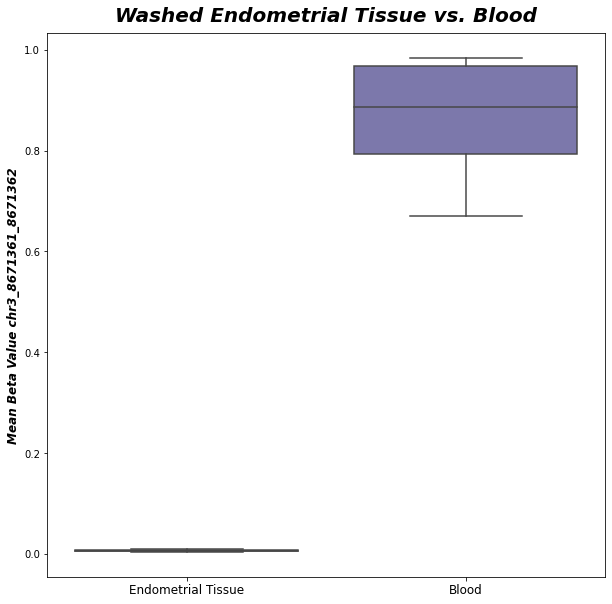

<Figure size 432x288 with 0 Axes>

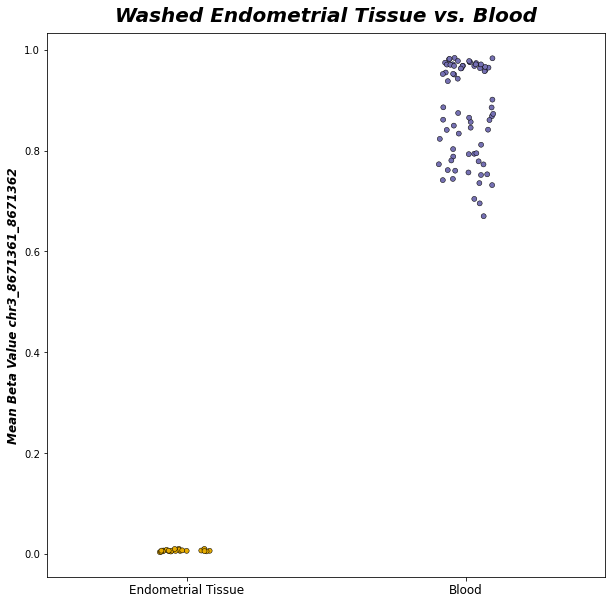

<Figure size 432x288 with 0 Axes>

In [289]:
endo_region = endo_df.loc[:,"chr3_8671361_8671362"]
endo_region = pd.DataFrame(endo_region)
endo_region["Tissue"] = "Endometrial Tissue"
endo_region.iloc[:]

blood_region = blood_df.loc[:,"chr3_8671361_8671362"]
blood_region = pd.DataFrame(blood_region)
blood_region["Tissue"] = "Blood"
# blood_dlk1.iloc[:]

combined_region = pd.DataFrame()
combined_region = combined_region.append(endo_region)
combined_region = combined_region.append(blood_region)
# dlk1 = pd.append(blood_dlk1)
combined_region.iloc[:]

# boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_region,x='Tissue',y='chr3_8671361_8671362',palette="Dark2_r")
# plt.legend()
plt.title("Washed Endometrial Tissue vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr3_8671361_8671362",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xlabel("")
plt.xticks(fontsize = 12)
plt.show()
plt.clf()

# Swarmplot
plt.figure(figsize=(10,10))
sns.stripplot(data=combined_region,x='Tissue',y='chr3_8671361_8671362',palette="Dark2_r",edgecolor = 'black',linewidth=.5)
# plt.legend()
plt.title("Washed Endometrial Tissue vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr3_8671361_8671362",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(fontsize = 12)
plt.xlabel("")
plt.show()
plt.clf()

In [ ]:
### This is if I wanted to plot individual plots for contamination
#  Look at sights with high blood and low endo methylation
for sample in endo_df_sig.index:
    diagnosis = endo_df_sig.loc[sample,"Category"]
    sample_subset = endo_df_sig.loc[sample,:]
    del sample_subset["Tissue"]
    del sample_subset["Category"]
    sample_subset = sample_subset.transpose()
    sample_subset = pd.DataFrame(sample_subset)
    plt.figure(figsize=(79,8))
    sns.barplot(data=high_blood_low_endo_methylation_deltas,x=high_blood_low_endo_methylation_deltas.index,y='Mean_of_betas_blood', color = 'blue')
    sns.barplot(data=high_blood_low_endo_methylation_deltas,x=high_blood_low_endo_methylation_deltas.index,y='Mean_of_betas_endo', color = 'red')
    sns.barplot(data=sample_subset,x=sample_subset.index,y=sample, color = 'green')
    plt.title((sample, diagnosis), fontsize = 30)
    plt.xticks(rotation=90,fontsize = 30)
    plt.ylim()
    plt.show()
    plt.clf()

# Looking at Significant Sites in Public Endometrial Tissue (450K)

In [200]:
beta_values_endo_1 =  pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Endometriosis_Dataset_450K/Endometriosis_Dataset_450K_beta_values.csv",header=0,index_col=0)
beta_values_endo_1.iloc[:]

,9806233006_R06C02,9806233005_R04C02,9806233142_R04C01,9806233142_R01C01,9828653081_R02C01,9806233122_R05C01,9806233122_R02C01,9806233006_R01C01,9806233142_R03C02,9806233142_R06C02,...,9806233006_R03C02,9806233142_R02C02,9806233122_R04C02,9806233142_R04C02,9828653081_R03C02,9828653081_R03C01,9828653081_R04C02,9806233005_R06C02,9806233005_R03C02,9806233005_R06C01
cg00050873,0.622243,0.800471,0.801882,0.552090,0.583781,0.695022,0.603280,0.658147,0.543671,0.615932,...,0.783946,0.634657,0.589795,0.680093,0.700648,0.718081,0.522020,0.638568,0.641001,0.695726
cg00212031,0.604054,0.515766,0.404018,0.455044,0.665513,0.490086,0.646749,0.641797,0.251567,0.623720,...,0.468966,0.400742,0.387337,0.612811,0.540606,0.533126,0.553655,0.649215,0.623990,0.619298
cg00213748,0.619456,0.533049,0.526882,0.548851,0.433333,0.512693,0.490490,0.547812,0.602167,0.318671,...,0.328358,0.502058,0.285632,0.590762,0.641439,0.396774,0.589375,0.356338,0.546235,0.606581
cg00214611,0.705368,0.491749,0.643857,0.336438,0.535599,0.408372,0.541116,0.489873,0.414773,0.570691,...,0.502818,0.679770,0.363025,0.732794,0.499621,0.578707,0.587260,0.503137,0.444134,0.737274
cg00455876,0.262597,0.272000,0.208733,0.304737,0.345060,0.403442,0.349153,0.363105,0.362982,0.225449,...,0.234521,0.339009,0.382070,0.323111,0.457616,0.376973,0.450370,0.310068,0.379197,0.162322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.22.909671F,0.184641,0.222660,0.173102,0.147917,0.147569,0.133014,0.171922,0.104898,0.135772,0.269456,...,0.191945,0.395530,0.179549,0.176590,0.072274,0.169324,0.161584,0.173310,0.123559,0.301085
ch.22.46830341F,0.047032,0.086126,0.063561,0.051122,0.049832,0.057513,0.052692,0.030926,0.058392,0.045782,...,0.046753,0.048887,0.057967,0.067382,0.035714,0.040575,0.037700,0.051085,0.066350,0.075472
ch.22.1008279F,0.026878,0.037238,0.018695,0.022869,0.019811,0.045002,0.022907,0.024317,0.028322,0.027667,...,0.037028,0.027598,0.039879,0.026995,0.019027,0.018581,0.029581,0.055156,0.027790,0.022642
ch.22.47579720R,0.127376,0.114687,0.117569,0.095349,0.128674,0.133000,0.150940,0.075770,0.111123,0.060563,...,0.112074,0.107356,0.119716,0.108199,0.091124,0.169240,0.087633,0.129289,0.140446,0.102919


In [201]:
beta_values_endo_2 =  pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Endometrial_Tissue_Dataset_450K/Endometrial_Tissue_Dataset_450K_beta_values.csv",header=0,index_col=0)
beta_values_endo_2.iloc[:]

,9806233005_R02C01,9806233005_R02C02,9806233005_R03C01,9806233005_R03C02,9806233005_R05C01,9806233005_R05C02,9806233005_R06C01,9806233005_R06C02,9806233006_R02C01,9806233006_R02C02,...,9806233142_R03C01,9806233142_R04C02,9806233142_R05C01,9806233142_R05C02,9828653081_R01C01,9828653081_R03C01,9828653081_R03C02,9828653081_R04C02,9828653081_R06C01,9828653081_R06C02
cg00050873,0.619084,0.581655,0.619385,0.641001,0.658901,0.625668,0.695726,0.638568,0.764184,0.743265,...,0.629185,0.680093,0.678715,0.713821,0.455663,0.718081,0.700648,0.522020,0.548714,0.744371
cg00212031,0.426617,0.357257,0.511421,0.623990,0.450600,0.665094,0.619298,0.649215,0.593035,0.529107,...,0.567096,0.612811,0.492462,0.586071,0.724203,0.533126,0.540606,0.553655,0.840825,0.502321
cg00213748,0.423114,0.629353,0.571295,0.546235,0.608795,0.335526,0.606581,0.356338,0.549087,0.453913,...,0.457511,0.590762,0.543302,0.570830,0.476858,0.396774,0.641439,0.589375,0.622816,0.440433
cg00214611,0.624596,0.626598,0.660848,0.444134,0.682891,0.630537,0.737274,0.503137,0.611984,0.389197,...,0.577840,0.732794,0.564731,0.597403,0.642578,0.578707,0.499621,0.587260,0.503417,0.484547
cg00455876,0.225873,0.341791,0.238519,0.379197,0.251948,0.251684,0.162322,0.310068,0.252026,0.219877,...,0.364147,0.323111,0.282795,0.350377,0.224274,0.376973,0.457616,0.450370,0.323402,0.479939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.22.909671F,0.219489,0.264915,0.220031,0.123559,0.255559,0.290678,0.301085,0.173310,0.160894,0.101828,...,0.155995,0.176590,0.237149,0.281379,0.056158,0.169324,0.072274,0.161584,0.157737,0.151216
ch.22.46830341F,0.079245,0.062850,0.094050,0.066350,0.058372,0.063748,0.075472,0.051085,0.036521,0.048631,...,0.057733,0.067382,0.052125,0.048635,0.040281,0.040575,0.035714,0.037700,0.049843,0.058402
ch.22.1008279F,0.015851,0.019477,0.016722,0.027790,0.037832,0.028803,0.022642,0.055156,0.034661,0.024103,...,0.029808,0.026995,0.029740,0.026859,0.016751,0.018581,0.019027,0.029581,0.046203,0.027549
ch.22.47579720R,0.104417,0.154670,0.196148,0.140446,0.208417,0.185016,0.102919,0.129289,0.083301,0.160726,...,0.089402,0.108199,0.171685,0.109563,0.101579,0.169240,0.091124,0.087633,0.127153,0.097463


In [202]:
beta_values_endo_3 =  pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Endometriosis_Dataset_2_450K/Endometriosis_Dataset_2_450K_beta_values.csv",header=0,index_col=0)
beta_values_endo_3.iloc[:]

,9403904014_R03C02,509403904014_R04C02,9403904014_R05C02,9403904014_R06C02,9422491167_R05C01,9422491167_R06C01,9422491167_R01C02,9422491167_R02C02,9422491054_R05C01,9422491054_R06C01,...,9422491054_R03C01,9422491054_R04C01,9422491167_R01C01,909422491167_R02C01,9422491167_R03C01,9422491167_R04C01,9422491166_R03C02,9422491166_R04C02,9422491166_R05C02,9422491166_R06C02
cg00050873,0.500631,0.466127,0.550061,0.576170,0.518757,0.598456,0.329531,0.527245,0.444878,0.552424,...,0.576304,0.490840,0.452444,0.422345,0.370270,0.483104,0.415563,0.453476,0.712743,0.710419
cg00212031,0.479887,0.495271,0.517719,0.362576,0.357977,0.435103,0.333333,0.466258,0.584778,0.327084,...,0.444288,0.548635,0.389845,0.393472,0.426955,0.565526,0.344135,0.423690,0.512239,0.466929
cg00213748,0.472203,0.505190,0.497315,0.540509,0.513349,0.420389,0.522462,0.448485,0.532118,0.517139,...,0.429961,0.629449,0.484608,0.255121,0.351692,0.540062,0.454450,0.621898,0.328571,0.533121
cg00214611,0.454900,0.508150,0.530999,0.474568,0.593914,0.369645,0.461997,0.470213,0.465625,0.482911,...,0.551187,0.317786,0.287614,0.483461,0.357267,0.516667,0.378362,0.463365,0.413793,0.488527
cg00455876,0.285392,0.287534,0.351652,0.376238,0.315604,0.262129,0.300100,0.394439,0.447761,0.439607,...,0.436071,0.425471,0.267808,0.279387,0.274129,0.202198,0.429852,0.495071,0.323600,0.393302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.22.909671F,0.476875,0.335196,0.513837,0.337043,0.281900,0.256298,0.169960,0.260539,0.404524,0.418160,...,0.482959,0.430464,0.213989,0.234518,0.159262,0.257143,0.216474,0.269151,0.249869,0.372900
ch.22.46830341F,0.057412,0.048304,0.048844,0.058287,0.039033,0.048794,0.029418,0.037358,0.046034,0.044308,...,0.034966,0.045083,0.023165,0.026028,0.034454,0.035548,0.035788,0.030617,0.043691,0.039963
ch.22.1008279F,0.055375,0.087062,0.057971,0.041503,0.035533,0.044147,0.040056,0.027845,0.041674,0.037555,...,0.024743,0.032595,0.023232,0.027422,0.032408,0.034965,0.032185,0.055146,0.034022,0.039186
ch.22.47579720R,0.088172,0.130169,0.107072,0.095412,0.097543,0.098803,0.059902,0.077709,0.080231,0.082028,...,0.091799,0.081808,0.045003,0.080443,0.078373,0.089832,0.080719,0.065459,0.096211,0.074654


In [203]:
beta_values_blood =  pd.read_csv("/Volumes/Research_Data/Renew_Diagnostics/Alzheimers_Study/Micro_Array_Data/450k_Data/Whole_Blood/peripheral_blood_betas.csv",header=0,index_col=0)
beta_values_blood.iloc[:]

,GSM4749846_3999431158_R01C02,GSM4749847_3999431144_R06C01,GSM4749848_3999442091_R05C01,GSM4749849_3999423019_R03C02,GSM4749850_3999431144_R04C02,GSM4749851_3999431158_R03C01,GSM4749852_3999423013_R03C01,GSM4749853_3999423013_R06C02,GSM4749854_3999431134_R03C02,GSM4749855_101103430136_R01C02,...,GSM4749886_101130760168_R02C02,GSM4749887_100946200085_R04C01,GSM4749888_101032560017_R04C01,GSM4749889_3998426048_R06C02,GSM4749890_3998426115_R02C01,GSM4749891_3998426019_R01C01,GSM4749892_3998426019_R06C02,GSM4749893_3998426116_R03C02,GSM4749894_100946200100_R04C02,GSM4749895_100946200085_R06C01
cg00050873,0.822018,0.847035,0.907359,0.462575,0.848342,0.854220,0.802016,0.568075,0.839962,0.596535,...,0.476510,0.522388,0.553073,0.508738,0.795653,0.445300,0.584721,0.389610,0.800411,0.520788
cg00212031,0.083466,0.057384,0.118009,0.402214,0.061329,0.046077,0.556762,0.475921,0.064013,0.293146,...,0.473325,0.285714,0.416667,0.387001,0.051664,0.565000,0.658041,0.421308,0.033303,0.380495
cg00213748,0.929050,0.829245,0.800164,0.581699,0.861990,0.850939,0.460674,0.607214,0.807220,0.510806,...,0.490272,0.496587,0.295597,0.605364,0.877016,0.604567,0.592803,0.505785,0.833333,0.598425
cg00214611,0.027096,0.097439,0.127215,0.275000,0.053217,0.056645,0.547515,0.431794,0.064509,0.401674,...,0.618037,0.538820,0.780793,0.455882,0.069310,0.429048,0.421603,0.430851,0.053753,0.564005
cg00455876,0.774988,0.690676,0.741969,0.228370,0.706438,0.782267,0.373406,0.316286,0.681168,0.501014,...,0.428767,0.374346,0.370737,0.350365,0.662382,0.387336,0.358936,0.355976,0.599774,0.338792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.22.909671F,0.150623,0.373143,0.136752,0.132630,0.183553,0.205487,0.171781,0.172262,0.174979,0.074323,...,0.072964,0.088161,0.078565,0.085537,0.113364,0.056805,0.074290,0.138974,0.085088,0.074942
ch.22.46830341F,0.028202,0.036074,0.047209,0.033254,0.039624,0.034383,0.040249,0.035830,0.043823,0.028737,...,0.035977,0.034301,0.032443,0.040423,0.033172,0.036051,0.040620,0.023348,0.037909,0.030066
ch.22.1008279F,0.021409,0.053655,0.048780,0.046829,0.038196,0.039335,0.034406,0.052738,0.041141,0.023779,...,0.024341,0.029044,0.026030,0.033874,0.028058,0.022041,0.028064,0.038287,0.048599,0.048862
ch.22.47579720R,0.083238,0.121215,0.099300,0.073020,0.094603,0.092584,0.095297,0.077744,0.077314,0.064067,...,0.091942,0.088925,0.110834,0.100343,0.092415,0.076831,0.092466,0.060787,0.083990,0.069320


In [204]:
sample_info_endo_1 = pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Endometriosis_Dataset_450K/sample_sheet.csv",header=0,index_col=0)
sample_info_endo_1.iloc[:4,:]

,Sample_Name,Sentrix_ID,Sentrix_Position,Index,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,...,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_supplementary_file.1,!Sample_data_row_count,!Sample_relation,!series_matrix_table_begin
Sample_ID,,,,,,,,,,,,,,,,,,,,,
9806233006_R06C02,E9_1_ES,9806233006,R06C02,GSM1906605,GSM1906605,Public on Feb 15 2016,Oct 13 2015,Feb 16 2016,genomic,1,...,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,485577,NaN,NaN
9806233005_R04C02,E12_1_ES,9806233005,R04C02,GSM1906606,GSM1906606,Public on Feb 15 2016,Oct 13 2015,Feb 16 2016,genomic,1,...,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,485577,NaN,NaN
9806233142_R04C01,E13_1_ES,9806233142,R04C01,GSM1906607,GSM1906607,Public on Feb 15 2016,Oct 13 2015,Feb 16 2016,genomic,1,...,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,485577,NaN,NaN
9806233142_R01C01,E11_1_ES,9806233142,R01C01,GSM1906608,GSM1906608,Public on Feb 15 2016,Oct 13 2015,Feb 16 2016,genomic,1,...,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1906...,485577,NaN,NaN


In [205]:
sample_info_endo_2 = pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Endometrial_Tissue_Dataset_450K/sample_sheet.csv",header=0,index_col=0)
sample_info_endo_2.iloc[:4,:]

,Sample_Name,Sentrix_ID,Sentrix_Position,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,...,!Sample_contact_department,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_supplementary_file.1,!Sample_data_row_count,!Sample_relation
Sample_ID,,,,,,,,,,,,,,,,,,,,,
9806233005_R02C01,04LH+2,9806233005,R02C01,GSM2396807,Public on Jun 20 2017,Nov 18 2016,Jun 20 2017,genomic,1,Endometrium,...,Obstetrics and Gynecology,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,437022,NaN
9806233005_R02C02,12013LH+2,9806233005,R02C02,GSM2396808,Public on Jun 20 2017,Nov 18 2016,Jun 20 2017,genomic,1,Endometrium,...,Obstetrics and Gynecology,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,437022,NaN
9806233005_R03C01,12009LH+9,9806233005,R03C01,GSM2396809,Public on Jun 20 2017,Nov 18 2016,Jun 20 2017,genomic,1,Endometrium,...,Obstetrics and Gynecology,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,437022,Reanalysis of: GSM1906637
9806233005_R03C02,40LH+8,9806233005,R03C02,GSM2396810,Public on Jun 20 2017,Nov 18 2016,Jun 20 2017,genomic,1,Endometrium,...,Obstetrics and Gynecology,University of Tartu,Puusepa 8,Tartu,51014,Estonia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2396...,437022,Reanalysis of: GSM1906647


In [207]:
sample_info_endo_3 = pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Endometriosis_Dataset_2_450K/sample_sheet.csv",header=0,index_col=0)
sample_info_endo_3.iloc[:4,:]

,Sample_Name,Sentrix_ID,Sentrix_Position,GEO_Name,Sample_Characteristics,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,...,!Sample_contact_city,!Sample_contact_state,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_supplementary_file.1,!Sample_data_row_count,!series_matrix_table_begin,ID_REF,!series_matrix_table_end
Sample_ID,,,,,,,,,,,,,,,,,,,,,
9403904014_R03C02,NUP1-E2,9403904014,R03C02,GSM3730349,"Genomic DNA from NUP eSF sample 1, treated wit...",Public on Feb 21 2020,Apr 18 2019,Feb 21 2020,genomic,1,...,San Francisco,CA,94143,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,0,NaN,GSM3730349,NaN
9403904014_R04C02,NUP1-P4,9403904014,R04C02,GSM3730350,"Genomic DNA from NUP eSF sample 1, treated wit...",Public on Feb 21 2020,Apr 18 2019,Feb 21 2020,genomic,1,...,San Francisco,CA,94143,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,0,NaN,GSM3730350,NaN
9403904014_R05C02,NUP1-E2+P4,9403904014,R05C02,GSM3730351,"Genomic DNA from NUP eSF sample 1, treated wit...",Public on Feb 21 2020,Apr 18 2019,Feb 21 2020,genomic,1,...,San Francisco,CA,94143,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,0,NaN,GSM3730351,NaN
9403904014_R06C02,NUP1-Veh,9403904014,R06C02,GSM3730352,"Genomic DNA from NUP eSF sample 1, treated wit...",Public on Feb 21 2020,Apr 18 2019,Feb 21 2020,genomic,1,...,San Francisco,CA,94143,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3730...,0,NaN,GSM3730352,NaN


In [208]:
sample_info_blood = pd.read_csv("/Volumes/Research_Data/Renew_Diagnostics/Alzheimers_Study/Micro_Array_Data/450k_Data/Whole_Blood/Peripheral_Blood_Controls_Sample_Info.csv",header=0,index_col=0)
sample_info_blood = sample_info_blood.loc[beta_values_blood.columns,:]
sample_info_blood.iloc[:5,:]

,Sample_Name,!Sample_geo_accession,Sentrix_ID,Sentrix_Position,Sample_Type,Sample_Group,Sex,Codon129,MRC Scale,Age
GSM4749846_3999431158_R01C02,Control1,GSM4749846,3999431158,R01C02,Peripheral_Blood,CTRL,Male,NaN,20.0,58
GSM4749847_3999431144_R06C01,Control2,GSM4749847,3999431144,R06C01,Peripheral_Blood,CTRL,Male,NaN,20.0,61
GSM4749848_3999442091_R05C01,Control3,GSM4749848,3999442091,R05C01,Peripheral_Blood,CTRL,Female,NaN,20.0,49
GSM4749849_3999423019_R03C02,Control4,GSM4749849,3999423019,R03C02,Peripheral_Blood,CTRL,Female,NaN,20.0,58
GSM4749850_3999431144_R04C02,Control5,GSM4749850,3999431144,R04C02,Peripheral_Blood,CTRL,Male,NaN,20.0,56


In [51]:
# # Find Overlap between EPIC significant sites and 450K array probes
# significant_dmr = gene_info.iloc[:]
# significant_dmr.index = significant_dmr["NAME"]
# significant_dmr = significant_dmr.loc[large_delta,:]
# significant_dmr.iloc[:]

# # Use this file in bedtools intersect
# significant_dmr.to_csv("/Volumes/Research_Data/My_Github/Endometriosis_Analysis/significant_USEQ_dmrs_EPIC.csv")

In [209]:
gene_info_450K = pd.read_csv("/Volumes/Research_Data/My_Github/Endometriosis_Analysis/Significant_USEQ_Regions_450K.txt",sep='\t',header=0)
gene_info_450K.iloc[:5,:]

,CHR,START,STOP,CG,NAME
0,chr1,235043974,235043975,cg20415947,chr1_235043974_235043975
1,chr1,77904032,77904033,cg21546950,chr1_77904032_77904033
2,chr2,100252968,100252969,cg02518546,chr2_100252968_100252969
3,chr2,197944718,197944719,cg02965295,chr2_197944718_197944719
4,chr2,43986106,43986107,cg05939149,chr2_43986106_43986107


In [210]:
result_450K = {}
count = 0

for index in gene_info_450K.index:
    key = gene_info_450K.iloc[index,4]
    value = gene_info_450K.iloc[index,3]

    if key not in result_450K:
        result_450K[key] = [value]
    else:    
        result_450K[key].append(value)

print(len(result_450K))

57


In [211]:
# Calculates the mean beta value for all endometrial tissue samples at all significant regions
endo_df_1=pd.DataFrame()
for key in result_450K:
    beta_key = beta_values_endo_1.loc[result_450K[key],:]
    endo_df_1[key] = (np.mean(beta_key))
endo_df_1.iloc[:5,:]

# Calculates the mean beta value for all endometrial tissue samples at all significant regions
endo_df_2=pd.DataFrame()
for key in result_450K:
    beta_key = beta_values_endo_2.loc[result_450K[key],:]
    endo_df_2[key] = (np.mean(beta_key))
endo_df_2.iloc[:5,:]

# Calculates the mean beta value for all endometrial tissue samples at all significant regions
endo_df_3=pd.DataFrame()
for key in result_450K:
    beta_key = beta_values_endo_3.loc[result_450K[key],:]
    endo_df_3[key] = (np.mean(beta_key))
endo_df_3.iloc[:5,:]

# Calculates the mean beta value for all peripheral blood samples at all significant regions
blood_450k_df=pd.DataFrame()
for key in result_450K:
    beta_key = beta_values_blood.loc[result_450K[key],:]
    blood_450k_df[key] = (np.mean(beta_key))
blood_450k_df.iloc[:5,:]

,chr1_235043974_235043975,chr1_77904032_77904033,chr2_100252968_100252969,chr2_197944718_197944719,chr2_43986106_43986107,chr2_173995795_173995796,chr2_20001490_20001491,chr2_210360812_210360813,chr2_9705768_9705769,chr3_8671361_8671362,...,chr12_29715218_29715219,chr13_80657784_80657785,chr14_68648563_68648564,chr14_77577414_77577613,chr15_69996022_69996023,chr15_63548963_63548964,chr16_68440620_68440621,chr17_13899286_13899287,chr17_53713264_53713265,chr19_5783127_5783128
GSM4749846_3999431158_R01C02,0.931993,0.860508,0.939269,0.911561,0.960332,0.952127,0.925000,0.902948,0.929728,0.787308,...,0.940398,0.931823,0.923103,0.942008,0.934964,0.930867,0.942930,0.968075,0.936914,0.870242
GSM4749847_3999431144_R06C01,0.904797,0.873093,0.959187,0.855172,0.963740,0.944816,0.806381,0.895206,0.950874,0.855866,...,0.918420,0.927037,0.926960,0.943157,0.911083,0.881784,0.935415,0.960406,0.892587,0.869161
GSM4749848_3999442091_R05C01,0.942985,0.882994,0.940362,0.859982,0.962329,0.936746,0.905290,0.902949,0.931300,0.739503,...,0.853095,0.920133,0.924192,0.946454,0.907302,0.883884,0.919538,0.955772,0.936650,0.911109
GSM4749849_3999423019_R03C02,0.936713,0.845255,0.942264,0.931665,0.980323,0.944063,0.888861,0.898122,0.920624,0.744188,...,0.917964,0.950715,0.919071,0.959198,0.925824,0.908348,0.917220,0.949229,0.915959,0.887757
GSM4749850_3999431144_R04C02,0.939290,0.887822,0.940411,0.906137,0.962818,0.941688,0.860454,0.906951,0.943795,0.714145,...,0.949053,0.940782,0.924248,0.939876,0.928776,0.898713,0.945203,0.940674,0.934139,0.911670


### Plotting DMR's

In [212]:
# Merge and write to a .csv where I added a column in excel that contained the Tissue Types I needed
plot_data_endo_1 = pd.merge(sample_info_endo_1,endo_df_1,left_index=True,right_index=True)
plot_data_endo_2 = pd.merge(sample_info_endo_2,endo_df_2,left_index=True,right_index=True)
plot_data_endo_3 = pd.merge(sample_info_endo_3,endo_df_3,left_index=True,right_index=True)
plot_data_blood = pd.merge(sample_info_blood,blood_450k_df,left_index=True,right_index=True)

plot_data_endo_1.to_csv("/Users/chadpollard/Desktop/Temp/plot_data_endo_1.csv")
plot_data_endo_2.to_csv("/Users/chadpollard/Desktop/Temp/plot_data_endo_2.csv")
plot_data_endo_3.to_csv("/Users/chadpollard/Desktop/Temp/plot_data_endo_3.csv")
plot_data_blood.to_csv("/Users/chadpollard/Desktop/Temp/plot_data_blood.csv")

In [290]:
# Then I read them back in and merged them
plot_data_endo_1 = pd.read_csv("/Users/chadpollard/Desktop/Temp/plot_data_endo_1.csv",header = 0,index_col=0)
plot_data_endo_1 = plot_data_endo_1.transpose()
plot_data_endo_1.iloc[:]

plot_data_endo_2 = pd.read_csv("/Users/chadpollard/Desktop/Temp/plot_data_endo_2.csv",header = 0,index_col=0)
plot_data_endo_2 = plot_data_endo_2.transpose()
plot_data_endo_2.iloc[:]

plot_data_endo_3 = pd.read_csv("/Users/chadpollard/Desktop/Temp/plot_data_endo_3.csv",header = 0,index_col=0)
plot_data_endo_3 = plot_data_endo_3.transpose()
plot_data_endo_3.iloc[:]

plot_data_blood = pd.read_csv("/Users/chadpollard/Desktop/Temp/plot_data_blood.csv",header = 0,index_col=0)
plot_data_blood = plot_data_blood.transpose()
plot_data_blood.iloc[:]

plot_data = pd.merge(plot_data_endo_1,plot_data_endo_2,left_index=True,right_index=True)
plot_data = pd.merge(plot_data,plot_data_endo_3,left_index=True,right_index=True)
plot_data = pd.merge(plot_data,plot_data_blood,left_index=True,right_index=True)
plot_data = plot_data.transpose()
plot_data.iloc[:]


,Sample_Name,Sentrix_ID,Sentrix_Position,Geo_ID,Sample_Type,chr1_235043974_235043975,chr1_77904032_77904033,chr2_100252968_100252969,chr2_197944718_197944719,chr2_43986106_43986107,...,chr12_29715218_29715219,chr13_80657784_80657785,chr14_68648563_68648564,chr14_77577414_77577613,chr15_69996022_69996023,chr15_63548963_63548964,chr16_68440620_68440621,chr17_13899286_13899287,chr17_53713264_53713265,chr19_5783127_5783128
Sample_ID,,,,,,,,,,,,,,,,,,,,,
9806233006_R06C02,E9_1_ES,9806233006,R06C02,GSM1906605,condition: endometriosis,0.175402,0.127468,0.126054,0.264763,0.155856,...,0.181726,0.146366,0.253337,0.160914,0.255509,0.221585,0.14495,0.174738,0.140132,0.476081
9806233005_R04C02,E12_1_ES,9806233005,R04C02,GSM1906606,condition: endometriosis,0.314169,0.20954,0.215705,0.220771,0.235038,...,0.243369,0.20342,0.282469,0.239665,0.238049,0.237277,0.233901,0.23372,0.178282,0.53751
9806233142_R04C01,E13_1_ES,9806233142,R04C01,GSM1906607,condition: endometriosis,0.136702,0.127251,0.167798,0.158216,0.145091,...,0.161211,0.155354,0.218001,0.145263,0.277805,0.132282,0.156406,0.164365,0.130395,0.510023
9806233142_R01C01,E11_1_ES,9806233142,R01C01,GSM1906608,condition: endometriosis,0.21863,0.109708,0.100347,0.145237,0.133128,...,0.146954,0.110176,0.158652,0.14239,0.174489,0.129978,0.139731,0.124435,0.109279,0.386983
9828653081_R02C01,E8_1_ES,9828653081,R02C01,GSM1906609,condition: endometriosis,0.125861,0.138245,0.115976,0.114847,0.15059,...,0.11204,0.129935,0.172389,0.112682,0.113697,0.12341,0.10381,0.150738,0.13736,0.430011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4749891_3998426019_R01C01,Control46,3998426019.0,R01C01,GSM4749891,Peripheral_Blood,0.959537,0.884852,0.940059,0.867094,0.955978,...,0.942491,0.926097,0.933898,0.951815,0.906596,0.911377,0.931766,0.935833,0.936808,0.86357
GSM4749892_3998426019_R06C02,Control47,3998426019.0,R06C02,GSM4749892,Peripheral_Blood,0.945494,0.883877,0.937084,0.880991,0.956917,...,0.926527,0.94579,0.92969,0.940667,0.926775,0.942806,0.94363,0.967025,0.934063,0.897935
GSM4749893_3998426116_R03C02,Control48,3998426116.0,R03C02,GSM4749893,Peripheral_Blood,0.924661,0.802495,0.950395,0.879366,0.953046,...,0.929767,0.931496,0.914179,0.941154,0.919684,0.933156,0.916701,0.94664,0.927977,0.858061


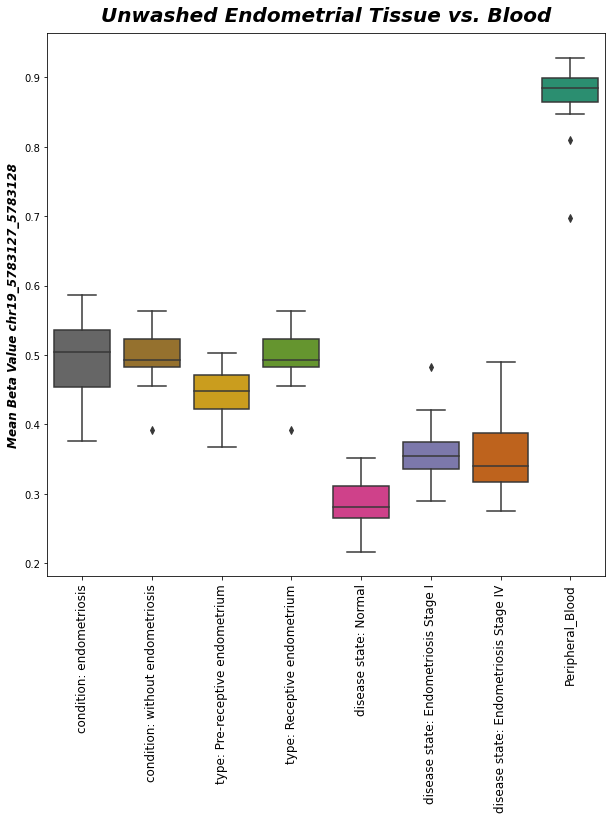

<Figure size 432x288 with 0 Axes>

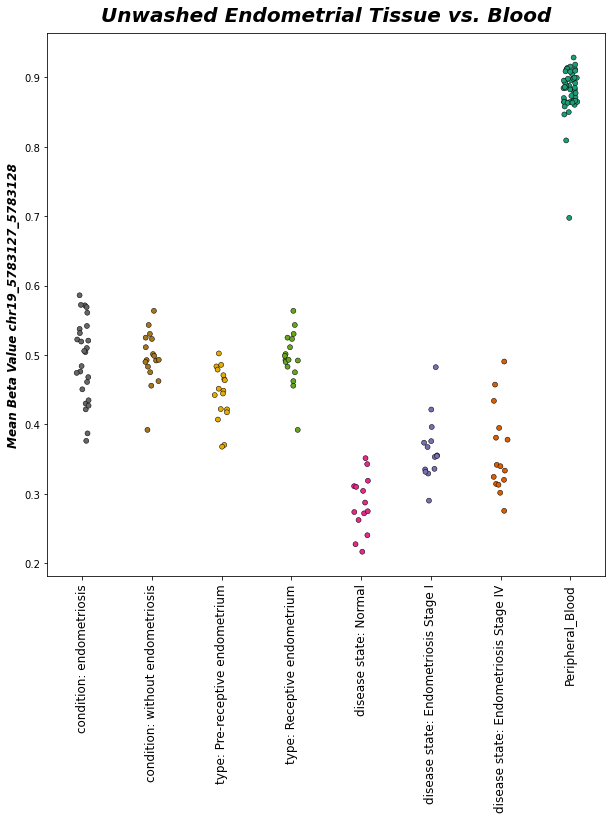

<Figure size 432x288 with 0 Axes>

In [291]:
# boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=plot_data,x='Sample_Type',y='chr19_5783127_5783128',palette="Dark2_r")
plt.title("Unwashed Endometrial Tissue vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr19_5783127_5783128",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xlabel("")
plt.xticks(rotation = 90, fontsize = 12)
# plt.xticks([])
plt.show()
plt.clf()

# Swarmplot
plt.figure(figsize=(10,10))
sns.stripplot(data=plot_data,x='Sample_Type',y='chr19_5783127_5783128',palette="Dark2_r",edgecolor = 'black',linewidth=.5)
#plt.legend()
plt.title("Unwashed Endometrial Tissue vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr19_5783127_5783128",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation = 90, fontsize = 12)
# plt.xticks([])
plt.xlabel("")
plt.show()
plt.clf()

# Looking at Significant Sites in Public Menstrual Blood (450K)

In [268]:
beta_values_menstrual_1 =  pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Menstrual_Blood_Dataset_1_450K/beta_values.csv",header=0,index_col=0)
beta_values_menstrual_1.iloc[:]

,GSM2047255,GSM2047256,GSM2047257,GSM2047258,GSM2047259,GSM2047260,GSM2047261,GSM2047262,GSM2047263,GSM2047264,GSM2047265,GSM2047266
cg00000029,0.193516,0.316101,0.297553,0.279347,0.201705,0.332769,0.197528,0.133294,0.319709,0.274906,0.222651,0.211525
cg00000108,0.905117,0.868701,0.892518,0.907087,0.907626,0.905895,0.880346,0.886982,0.938333,0.911623,0.918655,0.936752
cg00000109,0.749245,0.813102,0.823255,0.874487,0.847039,0.794252,0.789954,0.850374,0.820263,0.851583,0.805761,0.869132
cg00000165,0.123306,0.091243,0.126492,0.138177,0.118035,0.144878,0.098264,0.114480,0.119769,0.108258,0.126656,0.125423
cg00000236,0.628419,0.612886,0.644054,0.648814,0.727337,0.616044,0.615429,0.739506,0.639190,0.672183,0.726084,0.757650
...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,0.027964,0.021541,0.023399,0.037135,0.020097,0.016792,0.024735,0.031537,0.042047,0.025863,0.029169,0.039234
ch.X.97133160R,0.046754,0.041344,0.025684,0.042872,0.039558,0.037687,0.032238,0.039324,0.044178,0.028578,0.049956,0.062132
ch.X.97651759F,0.026657,0.016855,0.028813,0.034065,0.022291,0.025158,0.027338,0.029509,0.032387,0.025447,0.022642,0.029919
ch.X.97737721F,0.062451,0.071105,0.079862,0.080839,0.072799,0.061952,0.059694,0.062522,0.076324,0.079539,0.075146,0.060256


In [269]:
beta_values_menstrual_2 =  pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Mentrual_Blood_Dataset_2_450K/beta_values.csv",header=0,index_col=0)
beta_values_menstrual_2.iloc[:]

,GSM1438496,GSM1438497,GSM1438498,GSM1438499,GSM1438500,GSM1438501,GSM1438502,GSM1438503,GSM1438504,GSM1438505,...,GSM1438510,GSM1438511,GSM1438512,GSM1438513,GSM1438514,GSM1438515,GSM1438516,GSM1438517,GSM1438518,GSM1438519
!Sample_title,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.218792,0.182254,0.336868,0.443307,0.345672,0.381641,0.053140,0.105484,0.153925,0.055255,...,0.384559,0.212204,0.392234,0.378805,0.454877,0.450441,0.516155,0.514642,0.524231,0.463736
cg00000108,0.823823,0.876013,0.920445,0.931834,0.935382,0.929804,0.924616,0.935260,0.929095,0.916321,...,0.930665,0.943176,0.947187,0.932931,0.930574,0.926166,0.929078,0.940057,0.948348,0.944266
cg00000109,0.655589,0.613509,0.893832,0.862653,0.836503,0.833333,0.868321,0.898039,0.909373,0.934106,...,0.875831,0.844778,0.842822,0.890782,0.844656,0.861793,0.829690,0.828430,0.860040,0.861528
cg00000165,0.252285,0.242202,0.246855,0.206803,0.197710,0.209764,0.086228,0.094455,0.123891,0.065707,...,0.177349,0.162899,0.187382,0.200800,0.163158,0.209049,0.201106,0.190343,0.267248,0.320871
cg00000236,0.577485,0.738422,0.802696,0.725888,0.800921,0.746445,0.853573,0.866220,0.837370,0.842433,...,0.744712,0.813634,0.713821,0.731804,0.735859,0.731590,0.750683,0.772210,0.802118,0.753259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,0.239130,0.335150,0.047574,0.101304,0.142076,0.094340,0.131455,0.074561,0.085401,0.090557,...,0.036998,0.059842,0.049261,0.044118,0.008065,0.046525,0.041667,0.063641,0.095667,0.090017
ch.X.97133160R,0.201094,0.116931,0.126476,0.063477,0.127798,0.100351,0.086510,0.080696,0.059895,0.097959,...,0.052988,0.056490,0.048673,0.048599,0.061909,0.042865,0.084560,0.057495,0.073821,0.056414
ch.X.97651759F,0.495238,0.064877,0.041393,0.018447,0.038699,0.037146,0.031311,0.034981,0.019867,0.030335,...,0.031253,0.028231,0.033047,0.035489,0.029327,0.029126,0.026323,0.040036,0.034021,0.020295


In [270]:
sample_info_menstrual_1 = pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Menstrual_Blood_Dataset_1_450K/sample_sheet.csv",header=0,index_col=0)
sample_info_menstrual_1.iloc[:4,:]

,Characteristic,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,Sample_Source,!Sample_source_name_ch1,!Sample_organism_ch1,...,!Sample_contact_email,!Sample_contact_phone,!Sample_contact_department,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_data_row_count
Index,,,,,,,,,,,,,,,,,,,,,
GSM2047255,genomic DNA from menstual blood day1 of 20F15007,GSM2047255,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,Menstrual_Blood,menstrual blood of 20F15007,Homo sapiens,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM2047256,genomic DNA from menstual blood day1 of 20F15008,GSM2047256,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,Menstrual_Blood,menstrual blood of 20F15008,Homo sapiens,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM2047257,genomic DNA from menstual blood day1 of 30F15005,GSM2047257,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,Menstrual_Blood,menstrual blood of 30F15005,Homo sapiens,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM2047258,genomic DNA from menstual blood day2 of 20F15007,GSM2047258,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,Menstrual_Blood,menstrual blood of 20F15007,Homo sapiens,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577


In [271]:
sample_info_menstrual_2 = pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Mentrual_Blood_Dataset_2_450K/sample_sheet.csv",header=0,index_col=0)
sample_info_menstrual_2.iloc[:4,:]

,Characteristic,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,...,!Sample_contact_email,!Sample_contact_phone,!Sample_contact_department,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_data_row_count
Index,,,,,,,,,,,,,,,,,,,,,
GSM1438496,genomic DNA from saliva of male 20M03,GSM1438496,Public on May 26 2015,Jul 17 2014,May 26 2015,genomic,1,male_young_saliva,Homo sapiens,age (years): 20,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM1438497,genomic DNA from saliva of male 20M05,GSM1438497,Public on May 26 2015,Jul 17 2014,May 26 2015,genomic,1,male_young_saliva,Homo sapiens,age (years): 24,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM1438498,genomic DNA from saliva of male 20M06,GSM1438498,Public on May 26 2015,Jul 17 2014,May 26 2015,genomic,1,male_young_saliva,Homo sapiens,age (years): 27,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM1438499,genomic DNA from saliva of male 50M01,GSM1438499,Public on May 26 2015,Jul 17 2014,May 26 2015,genomic,1,male_old_saliva,Homo sapiens,age (years): 50,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577


In [272]:
# Calculates the mean beta value for all endometrial tissue samples at all significant regions
menstrual_df_1=pd.DataFrame()
for key in result_450K:
    beta_key = beta_values_menstrual_1.loc[result_450K[key],:]
    menstrual_df_1[key] = (np.mean(beta_key))
menstrual_df_1.iloc[:5,:]

# Calculates the mean beta value for all endometrial tissue samples at all significant regions
menstrual_df_2=pd.DataFrame()
for key in result_450K:
    beta_key = beta_values_menstrual_2.loc[result_450K[key],:]
    menstrual_df_2[key] = (np.mean(beta_key))
menstrual_df_2.iloc[:5,:]

,chr1_235043974_235043975,chr1_77904032_77904033,chr2_100252968_100252969,chr2_197944718_197944719,chr2_43986106_43986107,chr2_173995795_173995796,chr2_20001490_20001491,chr2_210360812_210360813,chr2_9705768_9705769,chr3_8671361_8671362,...,chr12_29715218_29715219,chr13_80657784_80657785,chr14_68648563_68648564,chr14_77577414_77577613,chr15_69996022_69996023,chr15_63548963_63548964,chr16_68440620_68440621,chr17_13899286_13899287,chr17_53713264_53713265,chr19_5783127_5783128
GSM1438496,0.630731,0.301546,0.796375,0.161663,0.791976,0.418231,0.534979,0.225076,0.144906,0.048316,...,0.520455,0.465185,0.324149,0.176972,0.247892,0.226667,0.458427,0.615625,0.508696,0.435575
GSM1438497,0.807840,0.296482,0.826969,0.247788,0.852694,0.274375,0.735872,0.173810,0.114976,0.062462,...,0.841475,0.724630,0.312199,0.192996,0.182526,0.144315,0.626784,0.820809,0.689516,0.571497
GSM1438498,0.915655,0.768985,0.900334,0.585543,0.930867,0.632977,0.838211,0.602319,0.597994,0.430853,...,0.899456,0.820095,0.624466,0.637776,0.530145,0.563777,0.787136,0.891084,NaN,0.630795
GSM1438499,0.909183,0.855143,0.939039,0.762330,0.931899,0.889322,0.881818,0.831240,0.834713,0.861716,...,0.852117,0.898382,0.934054,0.885409,0.804956,0.809786,0.881750,0.912829,0.820156,0.846071
GSM1438500,0.897543,0.750850,0.875934,0.711978,0.926970,0.791752,0.821315,0.804380,0.755280,0.697281,...,0.887148,0.828675,0.763536,0.766636,0.702372,0.706422,0.843246,0.941240,0.912946,0.773457


In [273]:
# Merge and write to a .csv where I added a column in excel that contained the Tissue Types I needed
plot_data_menstrual_1 = pd.merge(sample_info_menstrual_1,menstrual_df_1,left_index=True,right_index=True)
plot_data_menstrual_2 = pd.merge(sample_info_menstrual_2,menstrual_df_2,left_index=True,right_index=True)

plot_data_menstrual_1.to_csv("/Users/chadpollard/Desktop/Temp/plot_data_menstrual_1.csv")
plot_data_menstrual_2.to_csv("/Users/chadpollard/Desktop/Temp/plot_data_menstrual_2.csv")

In [292]:
# Then I read them back in and merged them
plot_data_menstrual_1 = pd.read_csv("/Users/chadpollard/Desktop/Temp/plot_data_menstrual_1.csv",header = 0,index_col=0)
plot_data_menstrual_1 = plot_data_menstrual_1.transpose()
plot_data_menstrual_1.iloc[:]

plot_data_menstrual_2 = pd.read_csv("/Users/chadpollard/Desktop/Temp/plot_data_menstrual_2.csv",header = 0,index_col=0)
plot_data_menstrual_2 = plot_data_menstrual_2.transpose()
plot_data_menstrual_2.iloc[:]

plot_data = pd.merge(plot_data_menstrual_1,plot_data_menstrual_2,left_index=True,right_index=True)
plot_data = pd.merge(plot_data,plot_data_blood,left_index=True,right_index=True)
plot_data = plot_data.transpose()
plot_data.iloc[:]

,Sample_Name,Sentrix_ID,Sentrix_Position,Geo_ID,Sample_Type,chr1_235043974_235043975,chr1_77904032_77904033,chr2_100252968_100252969,chr2_197944718_197944719,chr2_43986106_43986107,...,chr12_29715218_29715219,chr13_80657784_80657785,chr14_68648563_68648564,chr14_77577414_77577613,chr15_69996022_69996023,chr15_63548963_63548964,chr16_68440620_68440621,chr17_13899286_13899287,chr17_53713264_53713265,chr19_5783127_5783128
Sample_ID,,,,,,,,,,,,,,,,,,,,,
GSM2047255,genomic DNA from menstual blood day1 of 20F15007,GSM2047255,Public on May 14 2016,Jan 27 2016,Menstrual_Blood,0.509745,0.409676,0.380762,0.380841,0.440993,...,0.49736,0.418049,0.396769,0.352557,0.371666,0.399512,0.413739,0.445138,0.449511,0.650015
GSM2047256,genomic DNA from menstual blood day1 of 20F15008,GSM2047256,Public on May 14 2016,Jan 27 2016,Menstrual_Blood,0.796308,0.641215,0.61105,0.625863,0.765785,...,0.821185,0.662184,0.67674,0.660429,0.625693,0.628368,0.640223,0.698298,0.769032,0.74324
GSM2047257,genomic DNA from menstual blood day1 of 30F15005,GSM2047257,Public on May 14 2016,Jan 27 2016,Menstrual_Blood,0.760727,0.682907,0.668311,0.673754,0.756036,...,0.764546,0.712022,0.732189,0.73522,0.668712,0.753469,0.685079,0.75766,0.743786,0.752563
GSM2047258,genomic DNA from menstual blood day2 of 20F15007,GSM2047258,Public on May 14 2016,Jan 27 2016,Menstrual_Blood,0.716084,0.512129,0.552467,0.531212,0.68101,...,0.667485,0.62415,0.578707,0.579256,0.479852,0.557257,0.571621,0.62439,0.607446,0.632947
GSM2047259,genomic DNA from menstual blood day2 of 20F15008,GSM2047259,Public on May 14 2016,Jan 27 2016,Menstrual_Blood,0.780079,0.364263,0.392097,0.354872,0.727909,...,0.820571,0.469088,0.387224,0.352208,0.328916,0.362036,0.422602,0.452401,0.696716,0.661163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4749891_3998426019_R01C01,Control46,3998426019.0,R01C01,GSM4749891,Peripheral_Blood,0.959537,0.884852,0.940059,0.867094,0.955978,...,0.942491,0.926097,0.933898,0.951815,0.906596,0.911377,0.931766,0.935833,0.936808,0.86357
GSM4749892_3998426019_R06C02,Control47,3998426019.0,R06C02,GSM4749892,Peripheral_Blood,0.945494,0.883877,0.937084,0.880991,0.956917,...,0.926527,0.94579,0.92969,0.940667,0.926775,0.942806,0.94363,0.967025,0.934063,0.897935
GSM4749893_3998426116_R03C02,Control48,3998426116.0,R03C02,GSM4749893,Peripheral_Blood,0.924661,0.802495,0.950395,0.879366,0.953046,...,0.929767,0.931496,0.914179,0.941154,0.919684,0.933156,0.916701,0.94664,0.927977,0.858061


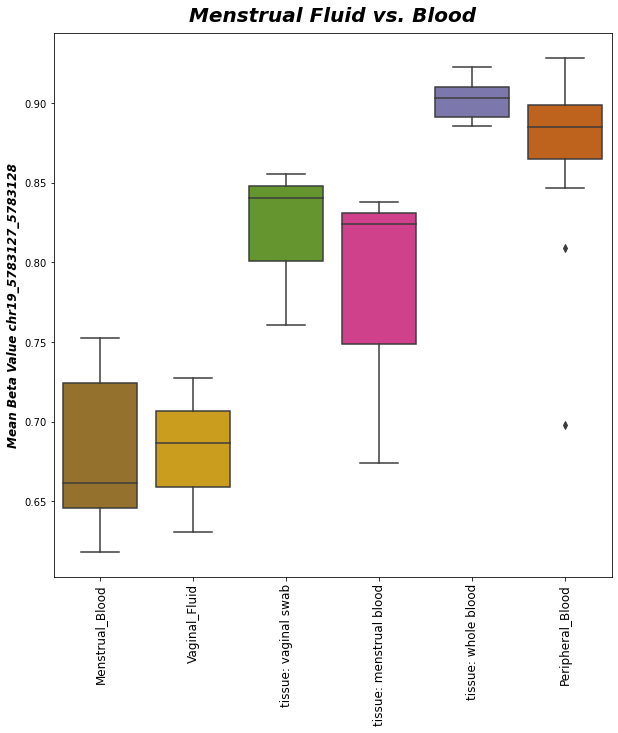

<Figure size 432x288 with 0 Axes>

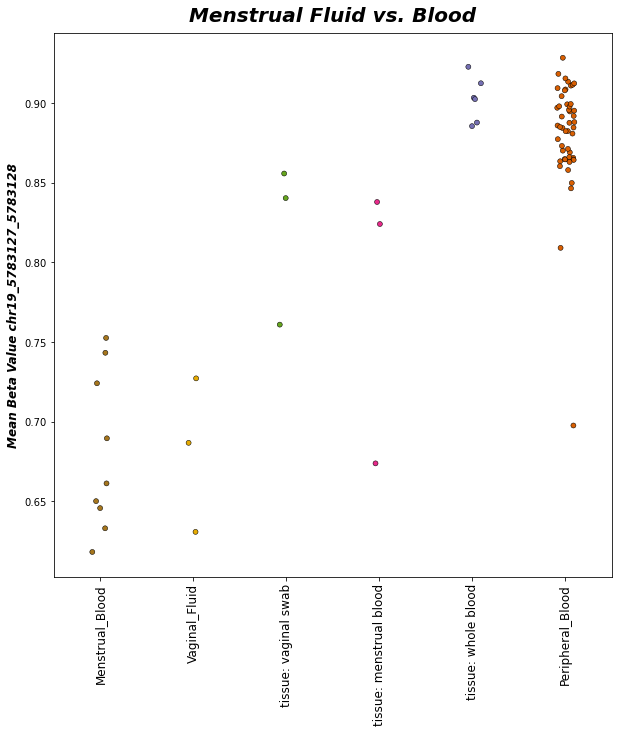

<Figure size 432x288 with 0 Axes>

In [293]:
# boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=plot_data,x='Sample_Type',y='chr19_5783127_5783128',palette="Dark2_r")
plt.title("Menstrual Fluid vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr19_5783127_5783128",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xlabel("")
plt.xticks(rotation = 90, fontsize = 12)
# plt.xticks([])
plt.show()
plt.clf()

# Swarmplot
plt.figure(figsize=(10,10))
sns.stripplot(data=plot_data,x='Sample_Type',y='chr19_5783127_5783128',palette="Dark2_r",edgecolor = 'black',linewidth=.5)
# If you want to add a legend  use (hue = )  in the previous command
#plt.legend()
plt.title("Menstrual Fluid vs. Blood",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
plt.ylabel("Mean Beta Value chr19_5783127_5783128",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation = 90, fontsize = 12)
# plt.xticks([])
plt.xlabel("")
plt.show()
plt.clf()